## Trying softmax

In [2]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [3]:
# let take y

y = torch.normal(0,0.1,size=(1,3))
num = torch.exp(y[0][0])
y, y[0][0], num

(tensor([[-0.1362,  0.0760,  0.0305]]), tensor(-0.1362), tensor(0.8726))

In [4]:
den = torch.exp(y).sum(dim=1)
den

tensor([2.9825])

In [5]:
softmax_value = num/den
softmax_value

tensor([0.2926])

### Exercises

1. We can explore the connection between exponential families and the softmax in some more
depth.
    1. Compute the second derivative of the cross-entropy loss l(y, yˆ) for the softmax.

    * after applying quotient rule for cross entropy loss the anaswer comes out to be zero.

    2. Compute the variance of the distribution given by softmax(o) and show that it matches
the second derivative computed above.

    * Its close to zero through experiments too. but why should this happen? is second derivative essentially same as variance?

    ![](variance_of_softmax.png)

2. Assume that we have three classes which occur with equal probability, i.e., the probability
vector is 1/3
    1. What is the problem if we try to design a binary code for it?

    * We would need at least 2 bits, and 00,01, 10 would be used but not 11. ?

    2. Can you design a better code? Hint: what happens if we try to encode two independent
observations? What if we encode n observations jointly?

    * we can do it through one hot encoding where the size of array would be the number of observations n

3. Softmax is a misnomer for the mapping introduced above (but everyone in deep learning
uses it). The real softmax is defined as RealSoftMax(a, b) = log(exp(a) + exp(b)).
    1. Prove that RealSoftMax(a, b) > max(a, b).

    
    2. Prove that this holds for λ
    −1RealSoftMax(λa, λb), provided that λ > 0.
    3. Show that for λ → ∞ we have λ
    −1RealSoftMax(λa, λb) → max(a, b).
    4. What does the soft-min look like?
    5. Extend this to more than two numbers

### finding variance

Find a mean of the set of data.
Subtract each number from a mean.
Square the result.
Add the results together.
Divide a result by the total number of numbers in the data set

In [6]:
#1

softmax_values = torch.exp(y)/ torch.exp(y).sum(dim=1)
softmax_values

tensor([[0.2926, 0.3618, 0.3457]])

In [7]:
mean_softmax = softmax_values.sum() / softmax_values.shape[1]
mean_softmax

tensor(0.3333)

In [8]:
# subtracting each number from mean and squaring the result and summing and deviding by totak number 
((softmax_values - mean_softmax) **2).sum()/ softmax_values.shape[1]

#its close to 0

tensor(0.0009)

In [9]:
#3

def realSoftmax(a, b):
    return torch.log(torch.exp(a) + torch.exp(b))

In [10]:
a = torch.tensor([2])
b = torch.tensor([3])

max(a,b), realSoftmax(a,b)

(tensor([3]), tensor([3.3133]))

In [11]:
l = torch.tensor([1.5])

(l)** 0.5 * realSoftmax(l * a, l * b) , max(a, b)

(tensor([5.7580]), tensor([3]))

In [12]:
l = torch.tensor([10])

(l)**0.5 * realSoftmax(l * a, l * b) , max(a, b)

(tensor([94.8685]), tensor([3]))

In [13]:
def softmin(a,b):
    return torch.log(torch.exp(a) - torch.exp(b))

In [14]:
def realSoftmaxMore(a,b,c):
    return torch.log(torch.exp(a) + torch.exp(b) + torch.exp(c))

In [15]:
realSoftmaxMore(a,b,torch.tensor([4])), max(a,b, torch.tensor([4]))

(tensor([4.4076]), tensor([4]))

# Image recognition

In [16]:
my_transforms = transforms.ToTensor()

In [17]:
train_dataset = torchvision.datasets.FashionMNIST(download=True, transform=my_transforms, train=True, root="data")
test_dataset = torchvision.datasets.FashionMNIST(download=True, transform=my_transforms, train=False, root="data")

In [18]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [19]:
X,y = train_dataset[0]

In [20]:
X.shape, y

(torch.Size([1, 28, 28]), 9)

In [21]:
def get_text_from_label(labels):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']

    return [text_labels[int(i)] for i in labels]

In [22]:
batch_size = 32
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

['ankle boot']


(<matplotlib.image.AxesImage at 0x21abff5bd60>, None)

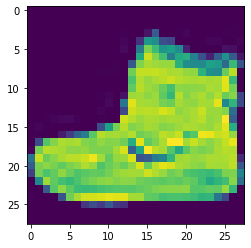

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X.permute(1,2,0)), print(get_text_from_label([y]))

In [24]:

%%time

# the time it takes to read the data

for X,y in train_dataloader:
    continue

Wall time: 3.36 s


In [25]:
test_dataloader= data.DataLoader(test_dataset,batch_size=32, shuffle=False, num_workers=4)

Exercises
1. Does reducing the batch_size (for instance, to 1) affect the reading performance?

increases

2. The data iterator performance is important. Do you think the current implementation is fast
enough? Explore various options to improve it.

https://stackoverflow.com/questions/61393613/pytorch-speed-up-data-loading

3. Check out the frameworkʼs online API documentation. Which other datasets are available?

In [26]:
#1

# train_dataloader= data.DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=4)

In [27]:
%%time

for X, y in train_dataloader:
    continue

Wall time: 3.24 s


In [28]:
#3

print(dir(torchvision.datasets))

['CIFAR10', 'CIFAR100', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'DatasetFolder', 'EMNIST', 'FakeData', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'ImageFolder', 'KMNIST', 'LSUN', 'LSUNClass', 'MNIST', 'Omniglot', 'PhotoTour', 'SBU', 'SEMEION', 'STL10', 'SVHN', 'VOCDetection', 'VOCSegmentation', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'cifar', 'cityscapes', 'coco', 'fakedata', 'flickr', 'folder', 'lsun', 'mnist', 'omniglot', 'phototour', 'sbu', 'semeion', 'stl10', 'svhn', 'utils', 'voc']


# Implementing softmax from scratch

In [80]:
#implementing the parameters

num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.1, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [81]:
# sum
X = torch.tensor([[1.0,2.0,3.0], [4.0,5.0,6.0]])
X.sum(axis=0, keepdim=True), X.sum(axis=1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [82]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp/partition

In [83]:
softmax(X)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [87]:
X = torch.normal(0,1,(3,3))
X_prob = softmax(X)
X_prob, X_prob.sum(dim=1)

(tensor([[0.6799, 0.2480, 0.0721],
         [0.1908, 0.5695, 0.2397],
         [0.2253, 0.6532, 0.1215]]),
 tensor([1., 1., 1.]))

In [88]:
# defining the model

def net(X):
    return softmax(torch.matmul(X.reshape(-1, W.shape[0]), W) + b)

In [89]:
# defining loss function

y = [0,2,1]

y_hat = softmax(X)

In [90]:
y_hat[[0,1,2], y] # we got the probability of true labels 

tensor([0.6799, 0.2397, 0.6532])

In [91]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

In [92]:
cross_entropy(y_hat, y)

tensor([0.3858, 1.4285, 0.4258])

In [95]:
y = torch.tensor(y)

In [93]:
# finding accuracy
def accuracy(y_hat, y):
    if len(y_hat.shape)>1 or y_hat.shape[1]>1:
        y_hat = y_hat.argmax(axis=1)
    
    cmp = y_hat.type(y.dtype) == y
#     print(cmp)
    return float(cmp.type(y.dtype).sum())
     

In [98]:
accuracy(y_hat, y)

2.0

In [99]:
accuracy(y_hat,y)/len(y)

0.6666666666666666

In [100]:
try:
    a = Accumulator(2)
except Exception as e:
    print(e)

In [101]:
class Accumulator:
    def __init__(self,n):
        self.data = [0] * n
        
    def add(self, *args):
        self.data = [a +float(b) for a, b in zip(self.data, args)]
    
    def reset(self):
         self.data = [0.0] * len(self.data)
            
    def __getitem__(self,idx):
        return self.data[idx]
        
        

In [105]:
def evaluate_accuracy(net, data_iter):
    if isinstance( net,torch.nn.Module):
        net.eval()
    
    #metrics = []
    metrics = Accumulator(2)
    with torch.no_grad():
        for X,y in data_iter:
            metrics.add(accuracy(net(X), y), y.numel())
    return metrics[0]/metrics[1]
#             metrics.append([accuracy(net(X), y), y.numel()])
        
    
#     return torch.tensor(metrics).sum(dim=0)[0]/torch.tensor(metrics).sum(dim=0)[1] 
            
    

In [106]:
%%time
metrics = evaluate_accuracy(net,train_dataloader )

Wall time: 3.81 s


In [107]:
metrics

0.08065

In [108]:
learning_rate=0.01
batch_size

32

In [109]:
def sgd(params=[w,b], batch_size= batch_size, learning_rate=learning_rate):
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param / batch_size
            param.grad.zero_()
    

In [110]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [64]:
## training

def train_one_epoch(net=net, data_iter=train_dataloader, optimizer=sgd, loss=cross_entropy):
    if isinstance(net, torch.nn.Module):
        net.train()
    
    metrics = Accumulator(n=3)
    
    for X,y in data_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if(isinstance(optimizer, torch.nn.Module)):
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            metrics.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        
        else:
            l.sum().backward()
            optimizer()
            metrics.add(float(l.sum()), accuracy(y_hat, y), y.numel())
        
    return metrics[0]/metrics[2], metrics[1]/metrics[2]
    
    
    
    


In [65]:
train_one_epoch()

(2.9120535953521727, 0.10361666666666666)

In [74]:
import d2l
import matplotlib.pyplot as plt

class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
#         d2l.use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: plt.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [111]:
def train_all(net=net, train_iter=train_dataloader, test_iter=test_dataloader, loss=cross_entropy, 
              num_epochs=10, optimizer=sgd):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3,0.9],legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_one_epoch(net=net, data_iter=train_dataloader, loss=loss, optimizer=optimizer)
        test_acc = evaluate_accuracy(net, test_iter)
#         animator.add(epoch +1, train_metrics + (test_acc,))
        print(f"for epoch: {epoch+1} , {train_metrics}, {test_acc}")
    train_loss, train_acc = train_metrics
#     assert train_loss < 0.5 , train_loss
#     assert train_acc <=1 and train_acc>0.7, train_acc
#     assert test_acc<=1 and test_acc>0.7, test_acc
    

for epoch: 1 , (3.011367841974894, 0.08065), 0.0828
for epoch: 2 , (3.011367832438151, 0.08065), 0.0828
for epoch: 3 , (3.011367839558919, 0.08065), 0.0828
for epoch: 4 , (3.0113678274790447, 0.08065), 0.0828
for epoch: 5 , (3.0113678328196207, 0.08065), 0.0828
for epoch: 6 , (3.0113678354899087, 0.08065), 0.0828
for epoch: 7 , (3.011367841974894, 0.08065), 0.0828
for epoch: 8 , (3.0113678298950197, 0.08065), 0.0828
for epoch: 9 , (3.011367832438151, 0.08065), 0.0828
for epoch: 10 , (3.0113678325653077, 0.08065), 0.0828


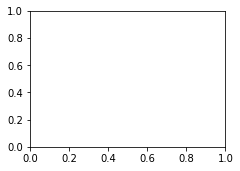

In [112]:
train_all()

In [121]:
train_iter = train_dataloader
test_iter = test_dataloader
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        print(f"for epoch: {epoch+1} , {train_metrics}, {test_acc}")
#         animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
#     assert train_loss < 0.5, train_loss
#     assert train_acc <= 1 and train_acc > 0.7, train_acc
#     assert test_acc <= 1 and test_acc > 0.7, test_acc

In [122]:
lr = 0.1

def updater(batch_size):
    return sgd([W, b], lr, batch_size)

In [ ]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

for epoch: 1 , (nan, 0.1), 0.1
for epoch: 2 , (nan, 0.1), 0.1
for epoch: 3 , (nan, 0.1), 0.1
for epoch: 4 , (nan, 0.1), 0.1
for epoch: 5 , (nan, 0.1), 0.1
for epoch: 6 , (nan, 0.1), 0.1
for epoch: 7 , (nan, 0.1), 0.1


In [ ]:
def predict_ch3(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
#     d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)